# 一.张量
Tensor是Tensorflow中最基础，最重要的数据结构，常翻译为张量，是管理数据的一种形式
## 1.张量的定义
所谓张量，可以理解为n维数组或者矩阵，Tensorflow提供函数：

In [ ]:
constant(value,dtype=None,shape=None,name="Const",verify_shape=False)

## 2.Tensor与Numpy的ndarray转换
#### Tensor转换为ndarray

In [1]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

t=tf.constant([1,2,3],tf.float32)

session=tf.Session()

array=session.run(t)

print(type(array))
print(array)

ModuleNotFoundError: No module named 'tensorflow'

也可以先创建会话，然后利用Tensor的成员函数eval，将Tensor转换为ndarray，代码如下;

In [ ]:
session=tf.Session()
array=t.eval(session=session)
print(array)

以上代码的另一种写法如下：

In [ ]:
with tf.Session() as session:
    array=t.eval()
    print(array)

#### ndarray 转换为 Tensor

In [1]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf
import numpy as np

array=np.array([1,2,3],np.float32)

t=tf.convert_to_tensor(array,tf.float32,name="t")

print(t)

Tensor("t:0", shape=(3,), dtype=float32)


### 3.张量的尺寸
张量的尺寸，又称张量的形状

In [2]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

t=tf.constant(
    [
        [1,2,3],
        [4,5,6]
    ]
    ,tf.float32
)

session=tf.Session()

s=tf.shape(t)
print("张量的形状：",session.run(s))

张量的形状： [2 3]


利用成员函数get_shape()或者成员变量shape得到张量的尺寸

In [3]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

t=tf.constant(
    [
        [1,2,3],
        [4,5,6]
    ],
    tf.float32
)

s=t.get_shape()

print("s的值：",s)
print(type(s))

print("s[0]的值：",s[0])
print("s[0]的数据结构类型：",type(s[0]))

print("将s[0]的值转换为整数型：")
print(s[0].value)
print(type(s[0].value))

s的值： (2, 3)
<class 'tensorflow.python.framework.tensor_shape.TensorShape'>
s[0]的值： 2
s[0]的数据结构类型： <class 'tensorflow.python.framework.tensor_shape.Dimension'>
将s[0]的值转换为整数型：
2
<class 'int'>


## 4.图像转换为张量

图像的形状： [180 180   3]


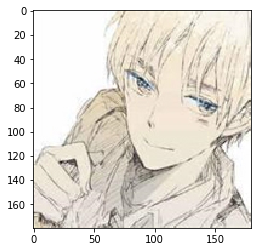

In [6]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf
import matplotlib.pyplot as plt

image=tf.read_file("LQ6H.png","r")

image_tensor=tf.image.decode_jpeg(image)

shape=tf.shape(image_tensor)

session=tf.Session()

print("图像的形状：",session.run(shape))

image_ndarray=image_tensor.eval(session=session)

plt.imshow(image_ndarray)
plt.show()

# 二.随机数
Tensorflow提供了很多产生不同概率分布的随机数的函数，如产生均匀分布随机数的函数random_uniform，产生正态分布随机数的函数random_norm，产生泊松分布随机数和正态分布随机数
## 1.平均分布随机数

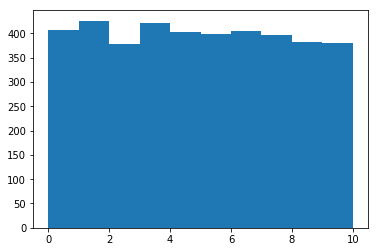

In [8]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf
import matplotlib.pyplot as plt

x=tf.random_uniform([10,4,20,5],minval=0,maxval=10,dtype=tf.float32)

session=tf.Session()

array=session.run(x)

array1d=array.reshape([-1])

plt.hist(array1d)
plt.show()

## 2.态(高斯)分布随机数

E:\Anaconda\envs\mytensorflow\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


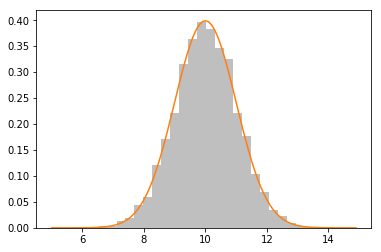

In [2]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math

sigma=1
mu=10

result=tf.random_normal([10,4,20,5],mu,sigma,tf.float32)
session=tf.Session()

array=session.run(result)

array1d=array.reshape([-1])

histogram,bins,patch=plt.hist(array1d,25,facecolor="gray",alpha=0.5,normed=True)

x=np.arange(5,15,0.1)

y=1.0/(math.sqrt(2*np.pi)*sigma)*np.exp(-np.power(x-mu,2.0)/(2*math.pow(sigma,2)))

plt.plot(x,y)
plt.show()

# 三.单个张量的运算
## 1.改变张量的数据类型
#### 数值型转换为bool型

In [4]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

t=tf.constant(
    [
        [0,2,0],
        [0,0,1]
    ]
    ,tf.float32
)

session=tf.Session()

r=tf.cast(t,tf.bool)

print(session.run(r))

[[False  True False]
 [False False  True]]


#### bool型转换为数值型

In [5]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

t=tf.constant(
    [
        [False,True,False],
        [False,False,True]
    ]
    ,tf.bool
)

session=tf.Session()

r=tf.cast(t,tf.float32)

print(session.run(r))

[[ 0.  1.  0.]
 [ 0.  0.  1.]]


## 2.访问张量中某一个区域的值
#### 一维张量中某一个区域的值

In [6]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

t1=tf.constant([1,2,3,4,5],tf.float32)

t=tf.slice(t1,[1],[3])

session=tf.Session()

print(session.run(t))

[ 2.  3.  4.]


#### 二维张量中某个区域的值

In [7]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

t2=tf.constant(
    [
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ]
    ,tf.float32
)

t=tf.slice(t2,[0,1],[2,2])

session=tf.Session()

print(session.run(t))

[[ 2.  3.]
 [ 6.  7.]]


#### 三维张量中某个区域的值

In [14]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

t3d=tf.constant(
    [
        [[2,5],[3,3],[8,2]],
        [[6,1],[1,2],[5,4]],
        [[7,9],[2,-3],[-1,3]]
    ]
    ,tf.float32
)

t=tf.slice(t3d,[1,0,1],[2,2,1])

session=tf.Session()

print(session.run(t))

[[[ 1.]
  [ 2.]]

 [[ 9.]
  [-3.]]]


## 3.转置

In [17]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

x=tf.constant(
    [
        [1,2,3],
        [4,5,6]
    ]
    ,tf.float32
)

session=tf.Session()

r=tf.transpose(x,perm=[1,0])

print(session.run(r))

[[ 1.  4.]
 [ 2.  5.]
 [ 3.  6.]]


In [18]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

x=tf.constant(
    [
        [[2,5],[3,4],[8,2]],
        [[6,1],[1,2],[5,4]]
    ]
    ,tf.float32
)

session=tf.Session()

r=tf.transpose(x,perm=[1,0,2])

print(session.run(r))

[[[ 2.  5.]
  [ 6.  1.]]

 [[ 3.  4.]
  [ 1.  2.]]

 [[ 8.  2.]
  [ 5.  4.]]]


## 4.改变形状

In [19]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

t3d=tf.constant(
    [
        [[1,2],[4,5],[6,7]],
        [[8,9],[10,11],[12,13]]
    ]
    ,tf.float32
)

session=tf.Session()

t1=tf.reshape(t3d,[4,1,-1])

print(session.run(t1))

[[[  1.   2.   4.]]

 [[  5.   6.   7.]]

 [[  8.   9.  10.]]

 [[ 11.  12.  13.]]]


#### 注意程序中t1=tf.reshape(t3d,[4,1,-1])等价于t1=tf.reshape(t3d,[4,1,3])

In [4]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

t4d=tf.constant(
    [
        [
            [[2,5],[3,3],[8,2]],
            [[6,1],[1,2],[5,4]]
        ],
        [
            [[1,2],[3,6],[1,2]],
            [[3,1],[1,2],[2,1]]
        ]
    ]
    ,tf.float32
)

t2d=tf.reshape(t4d,[2,-1])
#t2d=tf.reshape(t4d,[-1,3*3*2])

session=tf.Session()

print(session.run(t2d))

[[ 2.  5.  3.  3.  8.  2.  6.  1.  1.  2.  5.  4.]
 [ 1.  2.  3.  6.  1.  2.  3.  1.  1.  2.  2.  1.]]


## 5.归约运算

In [22]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

t1d=tf.constant([3,4,1,5],tf.float32)

sum0=tf.reduce_sum(t1d)
# sum0=tf.reduce_sum(t1d,axis=0)

session=tf.Session()

print(session.run(sum0))

13.0


In [23]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

value2d=tf.constant(
    [
        [5,1,4,2],
        [3,9,5,7]
    ]
    ,tf.float32
)

session=tf.Session()

sum0=tf.reduce_sum(value2d,axis=0)
print("沿0轴方向的和：")
print(session.run(sum0))

sum1=tf.reduce_sum(value2d,axis=1)
print("沿1轴方向的和：")
print(session.run(sum1))

sum01=tf.reduce_sum(value2d,axis=(0,1))
print("沿(0,1)平面的和：")
print(session.run(sum01))

沿0轴方向的和：
[  8.  10.   9.   9.]
沿1轴方向的和：
[ 12.  24.]
沿(0,1)平面的和：
36.0


# 四.对个张量之间的运算
## 二维张量的加法

In [29]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

value1=tf.constant(
    [
        [1,2,3],
        [4,5,6]
    ]
    ,tf.float32
)

value2=tf.constant(
    [
        [10],
        [20]
    ]
    ,tf.float32
)

result=tf.add(value1,value2)

session=tf.Session()

print(session.run(result))

[[ 11.  12.  13.]
 [ 24.  25.  26.]]


## 乘法
Tensorflow除了提供乘法函数multiply，还提供关于矩阵(二维张量)乘法的函数matmul

In [30]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

x=tf.constant(
    [
        [1,2],
        [3,4]
    ]
    ,tf.float32
)

w=tf.constant([[-1],[-2]],tf.float32)

y=tf.matmul(x,w)

session=tf.Session()

print(session.run(y))

[[ -5.]
 [-11.]]


## 4.张量的堆叠
#### 一维张量的堆叠

In [24]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

t1=tf.constant([1,2,3],tf.float32)

t2=tf.constant([7,8,9],tf.float32)

t=tf.stack([t1,t2],0)

session=tf.Session()

print(session.run(t))

[[ 1.  2.  3.]
 [ 7.  8.  9.]]


#### 二维张量的堆叠

In [26]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

t1=tf.constant(
    [
        [11,12,13],
        [14,15,16]
    ]
    ,tf.float32
)

t2=tf.constant(
    [
        [4,5,6],
        [7,8,9]
    ]
    ,tf.float32
)

session=tf.Session()

t=tf.stack([t1,t2],1)

print(session.run(t))

[[[ 11.  12.  13.]
  [  4.   5.   6.]]

 [[ 14.  15.  16.]
  [  7.   8.   9.]]]


# 五.占位符(placeholder)

In [27]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf
import numpy as np

x=tf.placeholder(tf.float32,[2,None],name="x")

w=tf.constant(
    [
        [1,2],
        [3,4],
        [5,6]
    ]
    ,tf.float32
)

y=tf.matmul(w,x)

session=tf.Session()

result1=session.run(y,feed_dict={x:np.array([[2,1],[1,2]],np.float32)})
print(result1)

result2=session.run(y,feed_dict={x:np.array([[-1],[2]],np.float32)})
print(result2)

[[  4.   5.]
 [ 10.  11.]
 [ 16.  17.]]
[[ 3.]
 [ 5.]
 [ 7.]]


# 六.Variable对象
Tensor对象的值是不可变的，Tensor类并没有提供任何成员函数改变其值，而且无法用同一个Tensor对象记录一个随时变化的值。Tensorflow中的Variable类可以解决该问题，保存随时变化的值

In [28]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

import tensorflow as tf

v=tf.Variable(tf.constant([2,3],tf.float32))

session=tf.Session()

session.run(tf.global_variables_initializer())

print("v初始化的值")
print(session.run(v))

session.run(v.assign_add([10,20]))
print("v的当前值")
print(session.run(v))

v初始化的值
[ 2.  3.]
v的当前值
[ 12.  23.]


#### 注意：创建Variable对象后，要调用方法global_variables_initializer()，才可以使用Variable对象的值，否则会报错